# Results_400
This notebook deals with the results of my fourth research question 'What python packages are being imported together regularly?'

## Purpose
* This notebook contains the results of my 4th research question
* This notebook contains association rule analysis and explores support, confidence and lift of association rules

In [1]:
#importing relevant libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import datetime
import pickle
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
 
%matplotlib inline

In [3]:
with open("../data/Txt_files/apriori.txt", "rb") as fp:   # Unpickling
    apriori_import = pickle.load(fp)

In [4]:
oht = TransactionEncoder()
oht_ary = oht.fit(apriori_import).transform(apriori_import)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
#print (df)           
 
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
#print (frequent_itemsets)
 
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

## Association rules

Association rules have three measures that express the degree of confidence in a rule, Support, Confidence, and Lift. The support is an indication of how frequently the itemset appears in the dataset. A minimum threshold of 0.05 was chosen for the support of the association rules, meaning these itemsets or rules appear in the data together 5\%  of the time or higher. The confidence is concerned with how likely the consequent appears when the antecedent is present. It is measured by the proportion of itemsets containing the antecedent, in which the consequent also appears. A minimum threshold of 0.5 was chosen for the confidence of these association rules. The lift is how likely the consequent appears when the antecedent is present. When the lift is > 1, the degree to which those two occurrences are dependent on one another becomes greater, and makes those rules potentially useful for predicting the consequent in future data sets. If the lift is < 1, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa. 

### Bubble plot 

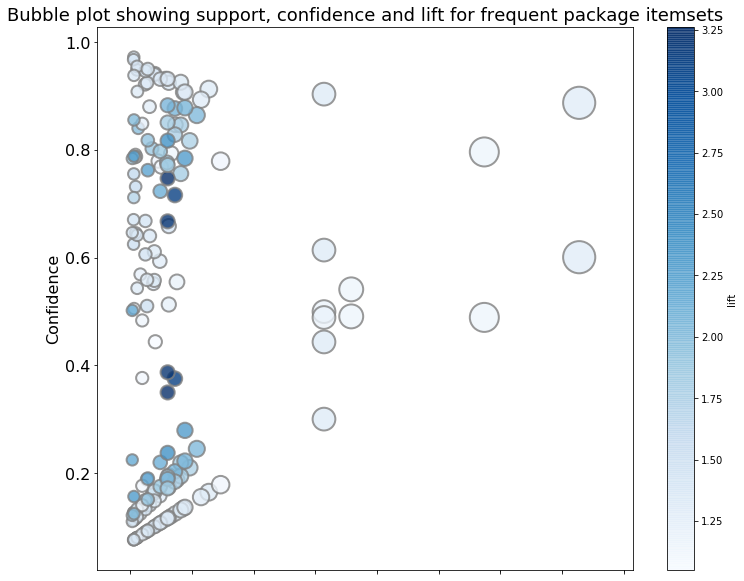

In [18]:
z = df_rules['support']
 
# use the scatter function
df_rules.plot.scatter(x = 'support', y = 'confidence', c= 'lift',  s=z*2500, cmap="Blues", 
                      alpha=0.8, edgecolors="grey", linewidth=2, figsize=(12, 10), fontsize = 16)
plt.xlabel("Support", fontsize = 16)
plt.ylabel("Confidence", fontsize = 16)
plt.title("Bubble plot showing support, confidence and lift for frequent package itemsets", fontsize = 18)
plt.savefig('../data/Images/bubble_plot.png', dpi = 100)
plt.show()

Above, is a bubble plot showing the support, confidence and lift of each of the association rules generated when apriori was applied to the data. Confidence of the each rule is represented by the y-axis and the support by the x-axis. The size of the bubbles also represents the support of the rules; the larger the bubble the higher the support. The lift is represented by the colour of the bubbles, the darker the colour the higher the lift. The largest bubbles, which are furthest along the X-axis depict both rules with the highest support at 0.413. These rules are the reverse of one another being (matplotlib.pyplot) --> (numpy) and (numpy) --> (matplotlib.pyplot). The 3 darker navy bubbles in a cluster near the bottom left of the graph represent 3 rules with a high lift. These rules are (numpy, pandas) --> (seaborn, matplotlib.pyplot),	(numpy, seaborn, pandas) -->  (matplotlib.pyplot) and (pandas, seaborn) --> (matplotlib.pyplot). These rules each have a lift of 2.45, 1.82 and 1.77 respectively. This high lift means that these rules can potentially useful for predicting what packages will be imported when the antecedent has been imported. 

This graph below was used to find the index of the bubble plot points

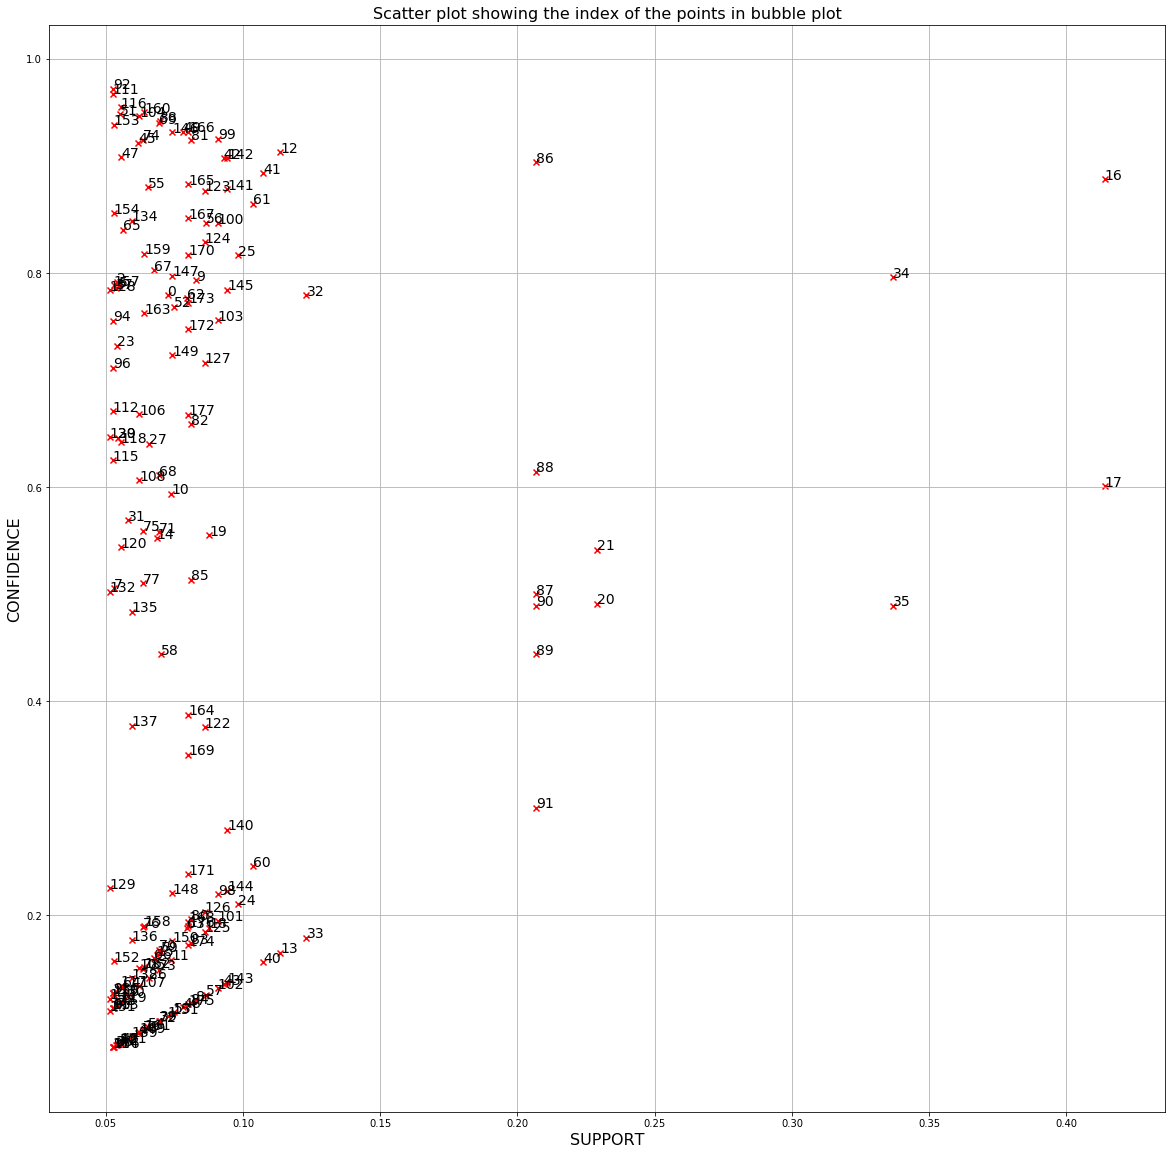

In [21]:
import matplotlib.pyplot

for i,type in enumerate(df_rules.index):
    y = df_rules.confidence[i]
    x = df_rules.support[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, type, fontsize=14)
    
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
plt.grid()
plt.xlabel("SUPPORT", fontsize = 16)
plt.ylabel("CONFIDENCE", fontsize = 16)
plt.title("Scatter plot showing the index of the points in bubble plot", fontsize = 16)
plt.savefig('../data/Images/bubble_plot_index.png', dpi = 100)
plt.show()

Looking at interesting points in the graph and finding which rules they equate to

In [25]:
df_rules = pd.DataFrame(rules)
df_rules.iloc[164]

antecedents           (numpy, seaborn, pandas)
consequents                (matplotlib.pyplot)
antecedent support                   0.0941961
consequent support                    0.466445
support                               0.080149
confidence                            0.850874
lift                                   1.82417
leverage                             0.0362117
conviction                             3.57787
Name: 164, dtype: object

### Association Rules Diagram

In [14]:
assoc_rule = rules.tail(2) # creating diagram of last 2 rules in dataframe

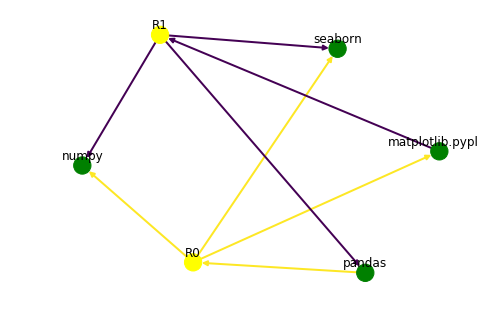

In [15]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10','R11', 'R12', 'R13', 'R14', 'R15']   
   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in rules.iloc[i]['antecedents']:
                
            G1.add_nodes_from([a])
        
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules.iloc[i]['consequents']:
             
            #G1.add_nodes_from()
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=20, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.savefig('../data/Images/assoc_rules.png', dpi = 100)
    plt.show()
 
     
draw_graph (assoc_rule, 2) 

The diagram above, portrays the association of 2 rules taken from the dataframe. The yellow nodes each depict a rule and the green nodes each depict a package within said rules. The arrows directed toward the rules or yellow nodes represent the antecedent and the arrows directed away from the rules represent the consequents. 